In [1]:
import numpy as np
from sklearn import linear_model, decomposition, model_selection, datasets
import sklearn
import scipy
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
brCancer_dataset = sklearn.datasets.load_breast_cancer()

In [4]:
brCancer_df = pd.DataFrame(brCancer_dataset['data'], columns = brCancer_dataset['feature_names'])
brCancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(brCancer_dataset['data'], brCancer_dataset["target"])

In [6]:
scalar = sklearn.preprocessing.StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
X_test.shape

(143, 30)

In [7]:
#Logistic Regression
def cost_fn(output, y_pred):
    return output*np.log(y_pred) + (1-output)*np.log(1-y_pred)

In [8]:
def gradient_fn(input, output, y_pred, param_vector):
    return (output - y_pred)*input

In [9]:
def logistic_reg(X, y, alpha, iterations):
    M,N = X.shape
    param_vector = np.random.rand(1,N)
    print(param_vector.shape)
    i = 0
    while i<iterations:
        batch_gradient = 0
        for j in range(M):
            z = -1*(param_vector @ X[j])
            y_pred = 1/(1+np.exp(z))
            batch_gradient += gradient_fn(X[j], y[j], y_pred, param_vector)
        param_vector = param_vector + alpha * (batch_gradient/M)
        i += 1
    return param_vector

In [10]:
param_test = logistic_reg(X_train, Y_train, 0.001, 10000)

(1, 30)


In [11]:
param_test

array([[ 0.25282782,  0.00352441, -0.23258263, -0.2780761 ,  0.13633537,
        -0.20564027, -0.04097527, -0.93214524, -0.16010655,  0.51893496,
        -0.12654887,  0.05797352, -0.40648376, -0.34716598, -0.24373921,
         0.22993676,  0.282631  , -0.08169215,  0.43029583, -0.27875035,
        -0.68552386, -0.60360022, -0.68410906, -0.55110147, -0.06314428,
         0.08796797, -0.74943205, -0.7219174 , -0.43671128, -0.34788492]])

In [12]:
def predict(X_test):
    y_pred = X_test @ param_test.transpose()
    y_p = []
    for i in y_pred:
        if i < 0:
            y_p.append(0)
        else:
            y_p.append(1)
    return y_p

In [13]:
y_pred = predict(X_test)

In [14]:
accuracy = sklearn.metrics.accuracy_score(Y_test, y_pred)
f1_score = sklearn.metrics.f1_score(Y_test, y_pred)

In [15]:
print(accuracy)
print(f1_score)

0.951048951048951
0.9575757575757575


In [16]:
#logistic regression using sklearn library
logisticReg = linear_model.LogisticRegression()
logisticReg.fit(X_train, Y_train)
y_lgPred = logisticReg.predict(X_test)

accuracy_lgReg = sklearn.metrics.accuracy_score(Y_test, y_lgPred)
f1_score_lgReg = sklearn.metrics.f1_score(Y_test, y_lgPred)
print(accuracy_lgReg)
print(f1_score_lgReg)

0.972027972027972
0.9761904761904762


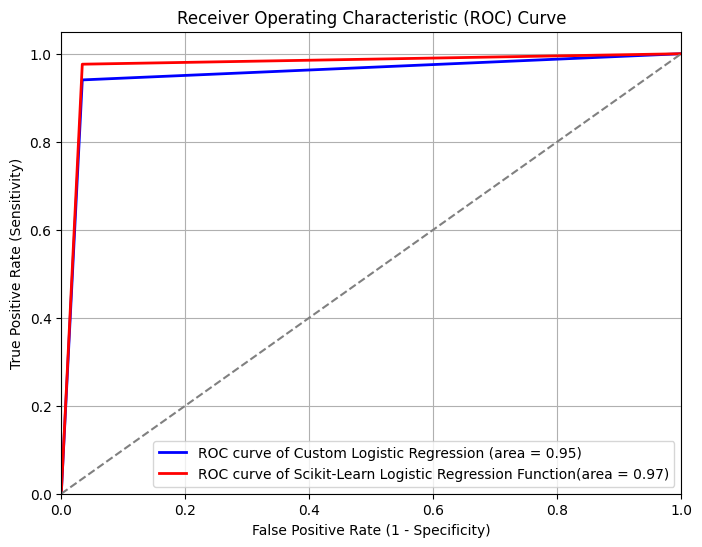

In [17]:
false_pos_roc, true_pos_roc, thresholds = sklearn.metrics.roc_curve(Y_test, y_pred)
roc_auc = sklearn.metrics.auc(false_pos_roc, true_pos_roc)

false_pos_roc_1, true_pos_roc_1, thresholds = sklearn.metrics.roc_curve(Y_test, y_lgPred)
roc_auc_1 = sklearn.metrics.auc(false_pos_roc_1, true_pos_roc_1)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_pos_roc, true_pos_roc, color='blue', lw=2, label='ROC curve of Custom Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot(false_pos_roc_1, true_pos_roc_1, color='red', lw=2, label='ROC curve of Scikit-Learn Logistic Regression Function(area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [102]:
#logistic regression using newton-raphson method
def logistic_reg_newton(X, y, tol):
    M,N = X.shape
    param_vector = np.random.rand(1,N)
    iterations = 1000
    i = 0
    while i<iterations:
        z = np.dot(param_vector, X.T)
        y_pred = 1/(1+np.exp(-z))
        grad_vec = np.dot(y-y_pred, X) / M
        diag_mat = y_pred.T@(1-y_pred)
        hessian_mat = (X.T @ diag_mat @ X)/M
        param_vector = param_vector - np.dot(grad_vec,np.linalg.pinv(hessian_mat))
        
        if np.linalg.norm(grad_vec) <= tol:
            print(i)
            break
        i += 1
    return param_vector

In [103]:
param_vec = logistic_reg_newton(X_train, Y_train, 1e-3)

C:\Users\susan\AppData\Local\Temp\ipykernel_21904\2746833213.py:9: RuntimeWarning: overflow encountered in exp
  y_pred = 1/(1+np.exp(-z))


In [104]:
param_vec.shape

(1, 30)

In [115]:
def predict(X_test):
    y_pred = X_test @ param_vec.transpose()
    print(y_pred.shape)
    y_p = []
    for i in y_pred:
        if i < 0:
            y_p.append(0)
        else:
            y_p.append(1)
    return y_p

In [116]:
y_pred = predict(X_test)

(143, 1)


In [118]:
accuracy = sklearn.metrics.accuracy_score(Y_test, y_pred)
f1_score = sklearn.metrics.f1_score(Y_test, y_pred)

In [119]:
accuracy

0.7342657342657343